In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

#matplotlib inline means whenever we plot graph it will not display on the screen and with the help of this inline it will display plots in the form of cell.

In [3]:
housing = pd.read_csv("housing_prices.csv")

In [4]:
housing.shape

(1460, 81)

In [5]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Exploratory Analysis

### Univariate

C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


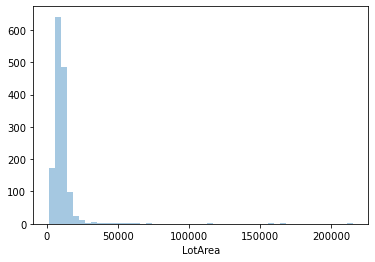

In [7]:
# Analyze the spread of the "LotArea" column

sns.distplot(housing["LotArea"], kde=False);

# kde=false means kernal density estimate 

C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


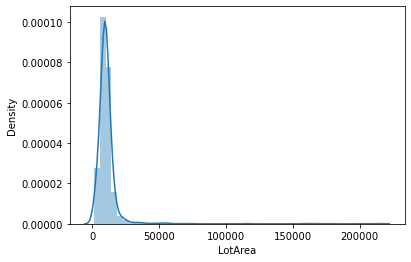

In [28]:
# Analyze the spread of the "LotArea" column

sns.distplot(housing["LotArea"], kde=True);

# kde=false means kernal density estimate 

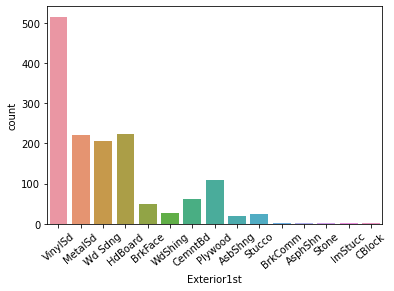

In [30]:
# What are the different types of housing exterios

# if you want bar chart then use countplot 

plot = sns.countplot(x = "Exterior1st", data = housing)
plot.set_xticklabels(plot.get_xticklabels(), rotation=40);
#set_xticklabels use for displaying x axis labels correctlyor it is spread labels evenly

### Bi-variate Analysis

<b> Q: Does the price of the house depend on the lot area? </b>

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

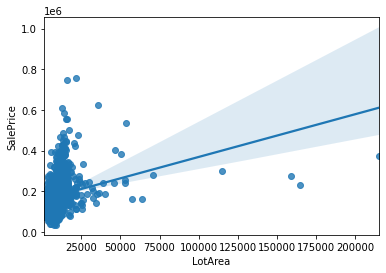

In [31]:
sns.regplot(x = "LotArea", y = "SalePrice", data = housing)
# regression plot i.e regplot is used for sactter plot 

In [33]:
# Are outliers skewing the relationship.. Redraw the relationshp after removing very large values
housing["LotArea"].quantile([0.5,0.95,0.99]) #quantile is used for finding percentile
housing_sub = housing.loc[housing["LotArea"] < housing["LotArea"].quantile(0.95)]
housing_sub

0.50     9478.50
0.95    17401.15
0.99    37567.64
Name: LotArea, dtype: float64

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Exterior_new,new_house
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500,VinylSd,New
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500,MetalSd,Old
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,223500,VinylSd,New
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,Others,Old
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000,VinylSd,Old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,8,2007,WD,Normal,175000,VinylSd,Old
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,MnPrv,NaN,0,2,2010,WD,Normal,210000,Others,Old
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,GdPrv,Shed,2500,5,2010,WD,Normal,266500,Others,Old
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,4,2010,WD,Normal,142125,MetalSd,Old


<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

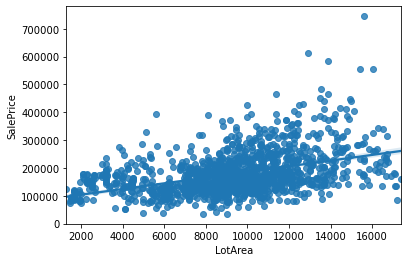

In [34]:
sns.regplot(x = "LotArea", y = "SalePrice", data = housing_sub)



In [12]:
housing["LotArea"].corr(housing["SalePrice"])
housing_sub["LotArea"].corr(housing_sub["SalePrice"])

0.2638433538714056

0.4302099912897768

### Plotting multiple graphs
<b> Q: Analyze the relationship between SalesPrice and all "Square Feet (SF)" related columns </b>

In [35]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [36]:
sf_cols = [col_name for col_name in housing.columns if "SF" in col_name]

In [39]:
len(sf_cols)
sf_cols

9

['BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'WoodDeckSF',
 'OpenPorchSF']

0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2


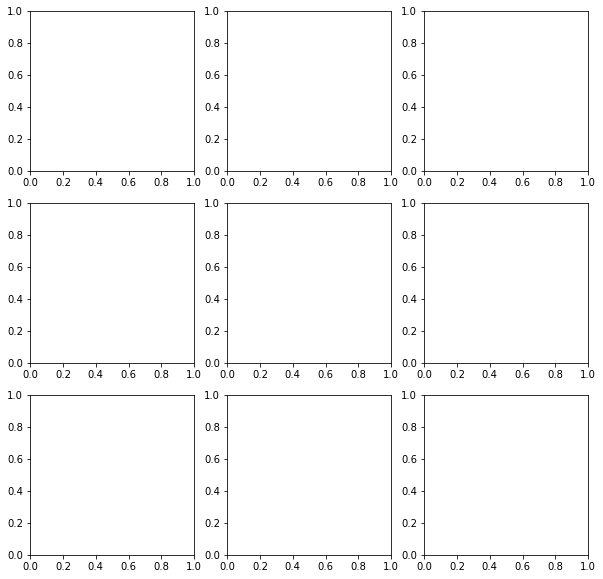

In [43]:
fig, axs = plt.subplots(nrows = 3,ncols = 3, figsize = (10,10))
for i in range(0, len(sf_cols)):
    rows = i // 3
    cols = i % 3
    print(rows,cols)

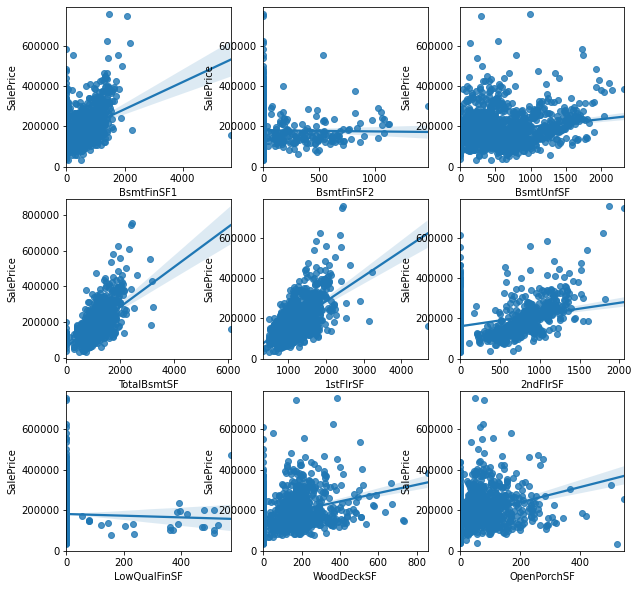

In [44]:
fig, axs = plt.subplots(nrows = 3,ncols = 3, figsize = (10,10))
for i in range(0, len(sf_cols)):
    rows = i // 3
    cols = i % 3
    ax = axs[rows, cols]
    plot = sns.regplot(x = sf_cols[i], y = "SalePrice", data = housing, ax=ax)

In [45]:
### Is the price of the house impacted by the Exterior covering on house
housing["Exterior1st"].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
CBlock       1
ImStucc      1
Name: Exterior1st, dtype: int64

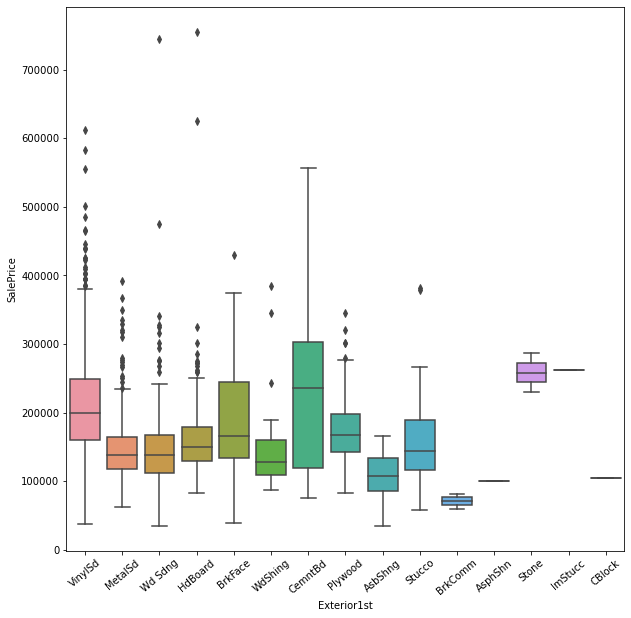

In [47]:
fig, axs = plt.subplots(figsize = (10,10))
plot=sns.boxplot(x = "Exterior1st", y = "SalePrice", data = housing, ax=axs);
plot.set_xticklabels(plot.get_xticklabels(), rotation=40);

<b>Q1. Rather than plotting the relationship between all the different types of Exterior, do the following:</b>

a) Create a new column - <i>"Exterior_New"</i> with only the top 3 values of Exterior in it. All other values are converted to "Others"

b) Plot the relationship between Sales price and this new columns

<b>Q2: Does the relationship between House exterior and Price change depending on how old the house is. For this question simply categorize houses into Old and New based on the condition: YearBuilt > 2000 "New" else "Old"</b>

<b> Q1. Rather than plotting the relationship between all the different types of Exterior, do the following:</b>

In [18]:
top_3_exterior = housing["Exterior1st"].value_counts().head(3)

In [19]:
top_3_exterior = list(top_3_exterior.index)

In [20]:
housing["Exterior_new"] = np.where(housing["Exterior1st"].isin(top_3_exterior),housing["Exterior1st"],"Others")

In [21]:
housing["Exterior_new"].value_counts()

VinylSd    515
Others     503
HdBoard    222
MetalSd    220
Name: Exterior_new, dtype: int64

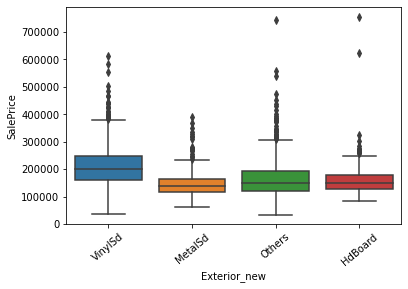

In [22]:
plot = sns.boxplot(x = "Exterior_new", y = "SalePrice", data = housing);
plot.set_xticklabels(plot.get_xticklabels(), rotation=40);

<b> Does the relationship between House exterior and Price change depending on how old the house is </b>

In [23]:
housing["new_house"] = np.where(housing["YearBuilt"] > 2000,"New","Old")

In [24]:
housing["new_house"].value_counts()

Old    1096
New     364
Name: new_house, dtype: int64

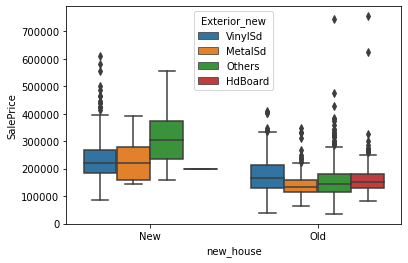

In [25]:
sns.boxplot(x = "new_house", y = "SalePrice", hue = "Exterior_new", data = housing);

In [26]:
housing.groupby(["Exterior_new","new_house"]).agg({"SalePrice":["count", "median"]})

SalePrice          
                           count    median
Exterior_new new_house                    
HdBoard      New               1  198500.0
             Old             221  149900.0
MetalSd      New              19  222000.0
             Old             201  135000.0
Others       New              35  303477.0
             Old             468  142976.5
VinylSd      New             309  219500.0
             Old             206  167075.0

<b> Has the type of exterior changed for newer homes compared to older houses </b>



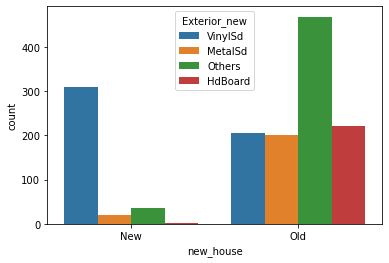

In [27]:
sns.countplot(x = "new_house", data = housing, hue = "Exterior_new");